In [1]:
from keras.datasets import cifar10
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D

Using TensorFlow backend.


In [2]:
#df = cifar10.load_data()

In [3]:
(X_train, y_train) , (X_test, y_test)  = cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
#Look at first image (index = 0 in training)
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

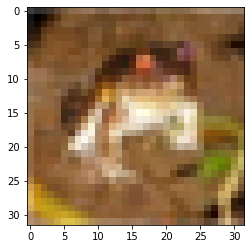

In [7]:
#show image as picture
img = plt.imshow(X_train[0])

In [22]:
#image label
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [21]:
#convert the labels into a set of 10 numbers
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

print (y_train_one_hot, y_test_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [23]:
#Print an example of new lables
y_train_one_hot[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [24]:
#Normalize the pixels to be values between 0 and 1 from 255
X_train = X_train/255
X_test = X_test/255


In [27]:
#instantiate
model = Sequential()


In [28]:
#convolution layer
model.add(Conv2D(32, (5, 5), activation = 'relu', input_shape = (32, 32, 3)))

In [30]:
#MaxPooling layer
model.add(MaxPool2D(pool_size = (2,2)))

In [31]:
#Flatten layer
model.add(Flatten())

In [33]:
model.add(Dense(1000, activation = 'relu'))

In [35]:
model.add(Dense(10, activation = 'softmax'))

In [36]:
#compile model
model.compile(loss = 'categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [42]:
#Train/fit the model
hist = model.fit(X_train, y_train_one_hot, batch_size=256, epochs=10, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 29s 829us/step - loss: 1.7160 - accuracy: 0.3833 - val_loss: 1.4730 - val_accuracy: 0.4712
Epoch 2/10
35000/35000 [==============================] - 28s 791us/step - loss: 1.2911 - accuracy: 0.5403 - val_loss: 1.2982 - val_accuracy: 0.5395
Epoch 3/10
35000/35000 [==============================] - 27s 761us/step - loss: 1.0948 - accuracy: 0.6126 - val_loss: 1.2002 - val_accuracy: 0.5755
Epoch 4/10
35000/35000 [==============================] - 26s 754us/step - loss: 0.9637 - accuracy: 0.6614 - val_loss: 1.2012 - val_accuracy: 0.5826
Epoch 5/10
35000/35000 [==============================] - 27s 762us/step - loss: 0.8234 - accuracy: 0.7113 - val_loss: 1.2168 - val_accuracy: 0.5867
Epoch 6/10
35000/35000 [==============================] - 25s 719us/step - loss: 0.6836 - accuracy: 0.7668 - val_loss: 1.1551 - val_accuracy: 0.6133
Epoch 7/10
35000/35000 [==============================] 

In [43]:
#get accuracy of model
model.evaluate(X_test, y_test_one_hot)[1]

10000/10000 [==============================] - 2s 218us/step


0.6154999732971191

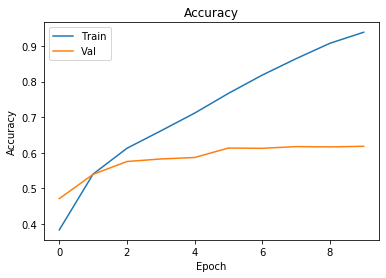

In [44]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc= 'upper left');

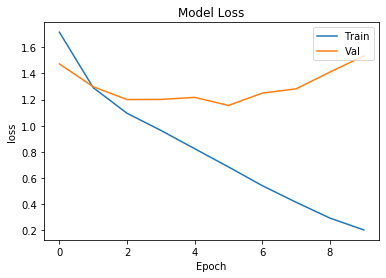

In [45]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("loss")
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc= 'upper right');

In [ ]:
#Load image data
my_image = plt